In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
init_notebook_mode(connected=True)

In [2]:
df_apps = pd.read_csv("googleplaystore.csv")
df_apps["Type"] = (df_apps["Type"] == "Paid").astype(int)
df_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
categories = list(df_apps["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
#Remove Category 1.9
categories.remove('1.9')
a = df_apps.loc[df_apps["Category"] == "1.9"]
print(a.head())
print("This mislabeled app category affects {} app at index {}.".format(len(a),int(a.index.values)))
df_apps = df_apps.drop(int(a.index.values),axis=0)
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs  Type     Price Content Rating             Genres  \
10472  1,000+     Free     0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  
This mislabeled app category affects 1 app at in

,App,Installs,Content Rating
0,Messenger – Text and Video Chat for Free,1000000000,Everyone
1,Google Drive,1000000000,Everyone
2,Instagram,1000000000,Teen
3,Google,1000000000,Everyone
4,Instagram,1000000000,Teen
5,Google+,1000000000,Teen
6,Subway Surfers,1000000000,Everyone 10+
7,Maps - Navigate & Explore,1000000000,Everyone
8,Google,1000000000,Everyone
9,Hangouts,1000000000,Everyone


In [4]:
popApps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1000000000,0,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1,Google Drive,PRODUCTIVITY,4.4,2731171,0.0,1000000000,0,0.00,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
2,Instagram,SOCIAL,4.5,66577313,0.0,1000000000,0,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3,Google,TOOLS,4.4,8033493,0.0,1000000000,0,0.00,Everyone,Tools,"August 3, 2018",Varies with device,Varies with device
4,Instagram,SOCIAL,4.5,66509917,0.0,1000000000,0,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8887,FK Atlantas,SPORTS,1.5,2,26000000.0,5,0,0.00,Everyone,Sports,"February 21, 2018",1.0,4.1 and up
8888,EB Cash Collections,BUSINESS,5.0,1,4300000.0,5,0,0.00,Everyone,Business,"July 31, 2018",1.10,4.4 and up
8889,KBA-EZ Health Guide,MEDICAL,5.0,4,25000000.0,1,0,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
8890,Ra Ga Ba,GAME,5.0,2,20000000.0,1,1,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up


In [5]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 1000000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 1000000)*1 #Installs Binarized
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(2566*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(6326*.17738)))

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(567,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)
print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(1122,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

X_train = X_train.drop(['Reviews', 'Size', 'Type'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Size', 'Type'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

There are 8892 total rows.
2566 Apps are Popular!
6326 Apps are Unpopular!

For an 80-20 training/test split, we need about 1778.4 apps for testing

Cut 567 apps off Popular df for a total of 3558 Popular training apps.
Cut 1122 apps off Unpopular df for a total of 3558 Unpopular training apps.

Values were not dropped from training dataframe. False
Values were not dropped from training dataframe. False


In [6]:
from sklearn.preprocessing import StandardScaler

# TODO :: It's your time to standardlize the training set and test set. (Hint : Recall from the frist problem in assignment4)
# Three lines of code expected, name standardlized training set X_train_std and standardlized test set X_test_std
scale = StandardScaler()
X_train_std = scale.fit_transform(X_train)
X_test_std = scale.transform(X_test)

In [7]:
X_train

,Category,Rating,Price,Content Rating,Genres
0,11,4.5,0.00,1,37
1,29,4.3,0.00,1,105
2,11,5.0,0.00,1,37
3,14,3.4,0.00,2,0
4,25,4.5,0.00,1,80
...,...,...,...,...,...
7198,28,4.7,0.00,1,99
7199,11,4.2,2.99,1,96
7200,5,3.2,0.00,4,32
7201,21,4.2,0.00,2,73


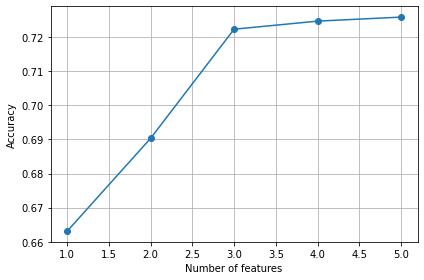

In [8]:
from sklearn.metrics import accuracy_score

def calc_score(estimator, X_train, y_train, X_test, y_test, indices):
    estimator.fit(X_train[:, indices], y_train)
    y_pred = estimator.predict(X_test[:, indices])
    score = accuracy_score(y_test, y_pred)
    return score

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import clone
from itertools import combinations

dim = X_train_std.shape[1]

indices = tuple(range(dim))
final_subsets = [indices]
knn = KNeighborsClassifier(n_neighbors=7)

score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, indices)
final_scores = [score]
k_features = 1

while dim > k_features:
    scores = []
    subsets = []

    for p in combinations(indices, r=dim - 1):
        score = calc_score(knn, X_train_std, y_train, X_test_std, y_test, p)
        scores.append(score)
        subsets.append(p)

    best = np.argmax(scores)
    indices = subsets[best]
    final_subsets.append(indices)
    dim -= 1
    final_scores.append(scores[best])
k_feat = [len(k) for k in final_subsets]
plt.plot(k_feat, final_scores, marker='o')
#plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

In [9]:
forest = RandomForestClassifier(n_estimators=500, max_features=3, max_depth=30, random_state=2, n_jobs=2)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, max_features=3, n_estimators=500, n_jobs=2,
                       random_state=2)

In [10]:
forest.score(X_test, y_test)

0.7448194197750148

 1) Rating                         0.397841
 2) Installs                       0.301740
 3) Category                       0.147453
 4) Size                           0.089199
 5) Reviews                        0.063767


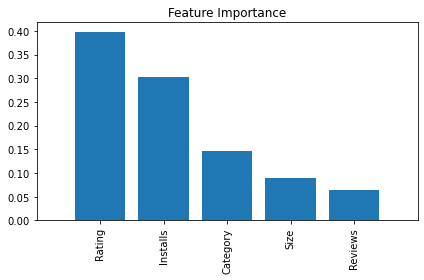

In [11]:
feat_labels = popApps.columns[1:]

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
#plt.savefig('images/04_09.png', dpi=300)
plt.show()

In [12]:
X_train

,Category,Rating,Price,Content Rating,Genres
0,11,4.5,0.00,1,37
1,29,4.3,0.00,1,105
2,11,5.0,0.00,1,37
3,14,3.4,0.00,2,0
4,25,4.5,0.00,1,80
...,...,...,...,...,...
7198,28,4.7,0.00,1,99
7199,11,4.2,2.99,1,96
7200,5,3.2,0.00,4,32
7201,21,4.2,0.00,2,73


In [13]:
y_pred_test = forest.predict(X_test)
confusion_matrix(y_test, y_pred_test)

array([[985, 137],
       [294, 273]], dtype=int64)

In [14]:
from sklearn.linear_model import LogisticRegression
lr_l2 = LogisticRegression(penalty='l2', C=0.1)
lr_l2.fit(X_train_std, y_train)
print('Accuracy Training L2 ', lr_l2.score(X_train_std, y_train))
print('Accuracy Test L2 ', lr_l2.score(X_test_std, y_test))

Accuracy Training L2  0.720394280161044
Accuracy Test L2  0.6660746003552398


In [15]:
forest=RandomForestClassifier(random_state=42)

In [21]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': [1,2,3,4,5],
    'max_depth' : [5,10,15,20,25,30,35,40,45,50]
}

In [22]:
from sklearn.model_selection import GridSearchCV

forest_gcv = GridSearchCV(estimator=forest, param_grid=param_grid, cv=5)
forest_gcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [200, 500]})

In [24]:
forest_gcv.best_params_

{'max_depth': 10, 'max_features': 2, 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=2, max_features='auto', n_estimators= 300, max_depth=10)

In [ ]:
rfc1.fit(X_train, y_train)

In [ ]:
pred=rfc1.predict(X_test)

In [ ]:
print("Accuracy: ",accuracy_score(y_test,pred))

In [27]:
forestc=RandomForestClassifier(random_state=2, max_features=2, n_estimators= 200, max_depth=10, n_jobs=2)
forestc.fit(X_train, y_train)
pred2=forestc.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,pred2))

Accuracy:  0.7418590882178804
